In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

from rdkit.Chem import AllChem
from rdkit import Chem, DataStructs

import matplotlib
from matplotlib import pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

colors = ['#f25c9d', '#F2A25C', '#5B98A6', '#8BB63C']
path = 'e:/_phd/Docking_score/VDR/Data/'

In [92]:
df1 = pd.read_csv(path + "VDR_VDRML_ECR_plus_docking_results_plus_rank_1DB1_3KPZ.csv")
df2 = pd.read_csv(path + "VDR_actives_decoys_ECR_plus_docking_results_plus_rank_1DB1_3KPZ.csv")
df = pd.concat([df1, df2])
names = df.columns[2:].to_list()
names = ['id', 'smi', 'label', 'active'] + names

df = df.rename(columns={'smiles': 'smi'})
#df['log10_1PQ6'] = (np.log10(df.ECR_1PQ6))
#df['log10_1P8D'] = (np.log10(df.ECR_1P8D))  

a = df.id.str[:3]
df['label'] =  np.where(a == 'VDR', 1, np.where(a == 'CHE', 2, 3))
x = (df.ECR_3KPZ!=0.0).to_list()
y = (df.ECR_1DB1!=0.0).to_list()

df['active'] =  x and y

df = df[names]
#df = df[df.ECR_3KPZ!=0.0]
df.head()

,id,smi,label,active,ECR_1DB1,ECR_3KPZ,docking_score_CHEMPLP_1DB1,rank_CHEMPLP_1DB1,docking_score_CHEMPLP_3KPZ,rank_CHEMPLP_3KPZ,...,docking_score_ASE_3KPZ,rank_ASE_3KPZ,docking_score_AHB_1DB1,rank_AHB_1DB1,docking_score_AHB_3KPZ,rank_AHB_3KPZ,docking_score_AdG_1DB1,rank_AdG_1DB1,docking_score_AdG_3KPZ,rank_AdG_3KPZ
0,VDRML1546,O(CC(O)C(C)(C)C)c1ccc(cc1C)C(CC)(CC)c1ccc(NC(=...,1,True,0.090484,8.434543e-02,-131.066,676,-17.6334,8829,...,-31.978943,4618,-112.68742,1242,-143.19096,37,-7.871343,2919,-7.596623,3585
1,VDRML15305,OC1CC(CC(O)C1=O)=CC=C1C2CCC(C(CCCC(C(OC)=O)=C)...,1,True,0.081873,8.229747e-04,-123.825,2309,-18.6333,4342,...,-35.209217,706,-125.23082,154,-141.67232,48,-8.447162,1902,-9.513477,764
2,VDRML5893,O(C(C)c1cc(C)c(OCc2cc(CO)c(O)cc2)cc1)c1ccc(cc1...,1,True,0.074082,8.315287e-08,-111.414,5967,-17.1616,10025,...,-33.155910,2993,-111.73127,1390,-106.90669,5259,-8.426403,1932,-7.020804,5132
3,VDRML1549,O(CC(O)C(C)(C)C)c1ccc(cc1C)C(CC)(CC)c1ccc(NC(=...,1,True,0.067032,2.238445e-03,-135.388,224,-17.1147,10407,...,-34.730606,1082,-118.08389,591,-137.82195,112,-9.545495,742,-6.543454,6626
4,VDRML7446,FC(F)(F)C(O)(C=CC=C(CC)c1cc(ccc1)CCc1cc(O)c(OC...,1,True,0.060663,3.337327e-03,-138.572,93,-18.5782,4701,...,-31.720736,4949,-104.19946,3038,-134.20854,211,-11.143661,120,-8.886983,1357


In [4]:
#plot = sns.pairplot(df.iloc[:,5:16])
#plot.savefig(path+"expl_ds_results/corr_all.png")

In [94]:
df.active.value_counts()

True     15238
False     2302
Name: active, dtype: int64

In [40]:
names = df.columns[5:]
col_1DB1 = [n for n in names if '1DB1' in n]
col_1DB1 = [n for n in col_1DB1 if 'rank' not in n]
col_3KPZ = [n for n in names if '3KPZ' in n]
col_3KPZ = [n for n in col_3KPZ if 'rank' not in n]
print(col_1DB1)

['docking_score_CHEMPLP_1DB1', 'docking_score_london_1DB1', 'docking_score_ASE_1DB1', 'docking_score_AHB_1DB1', 'docking_score_AdG_1DB1']


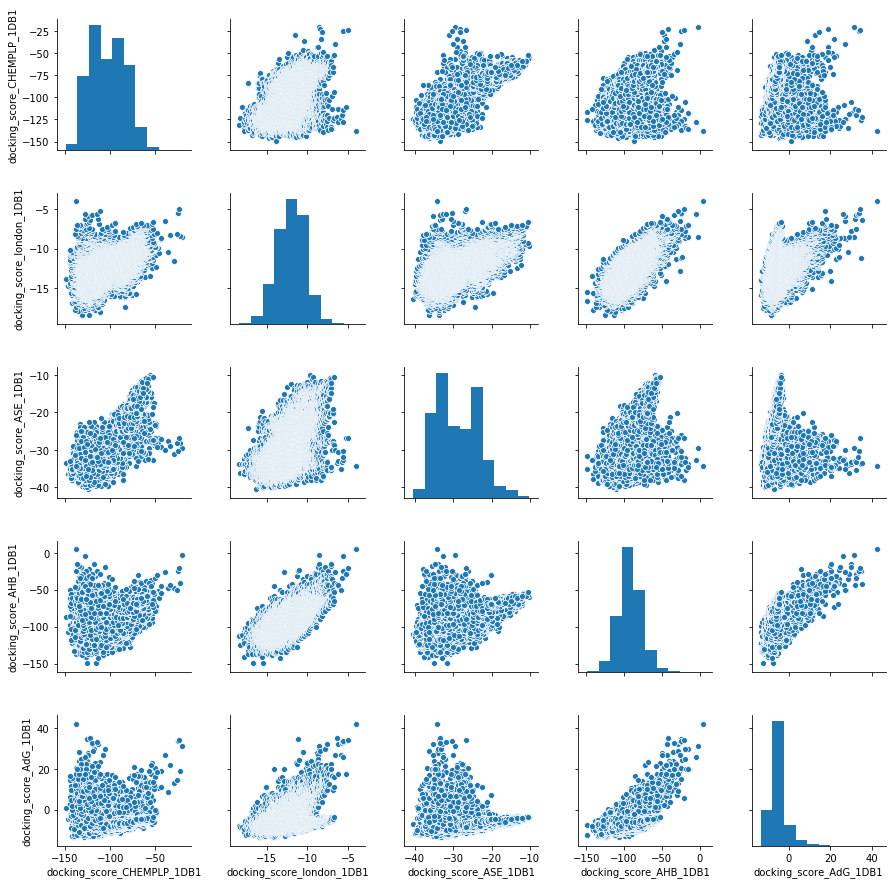

In [19]:
plot = sns.pairplot(df[col_1DB1])
plot.savefig(path+"expl_ds_results/corr_1DB1.png")

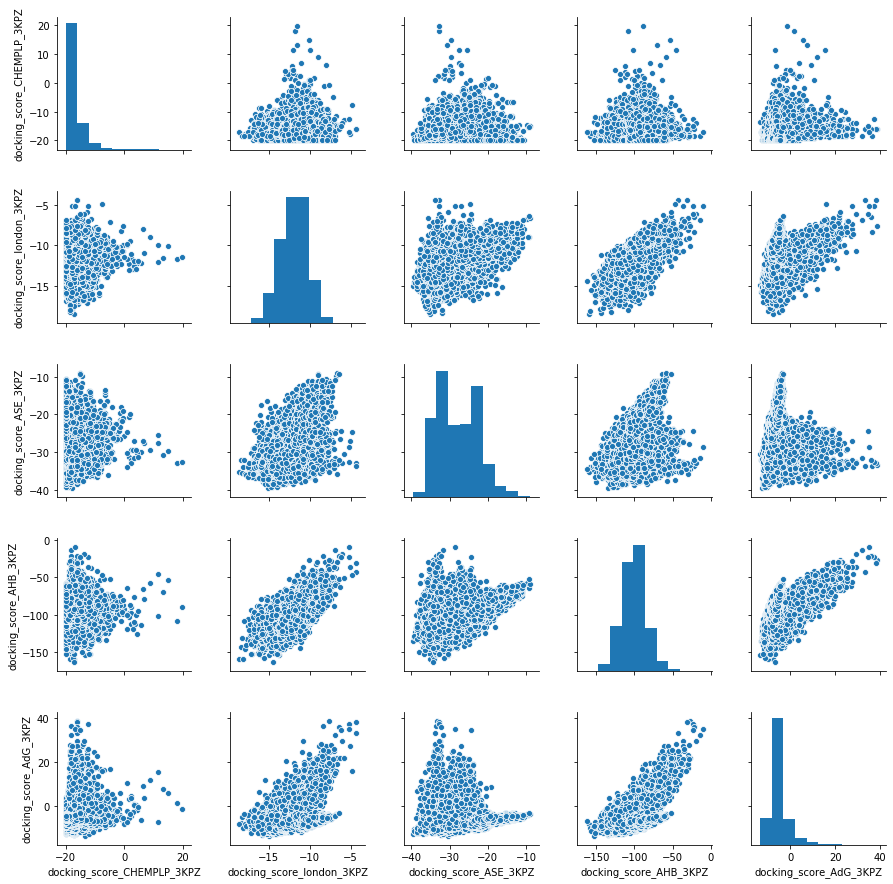

In [15]:
plot = sns.pairplot(df[col_3KPZ])
plot.savefig(path+"expl_ds_results/corr_3KPZ.png")

In [41]:
names_ds = [n for n in names if 'rank' not in n]
names_ds = ['id', 'smi', 'label'] + names_ds

In [42]:
df = df[names_ds]

In [26]:
pca = PCA(2)
transformed = pca.fit_transform(df.iloc[:, 3:])
X_embedded = TSNE(n_components=2, perplexity=50).fit_transform(df.iloc[:, 3:])

KeyboardInterrupt: 

<function matplotlib.pyplot.show(*args, **kw)>

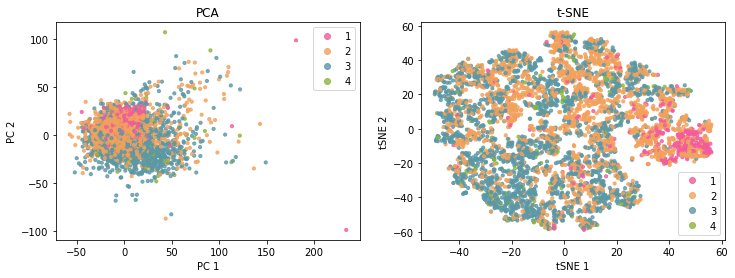

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title('PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
scatter = plt.scatter(transformed[:,0], transformed[:,1], 
                      c=df['cat_1P8D'],cmap=matplotlib.colors.ListedColormap(colors),
                      s=10, alpha=0.8) #, cmap='bwr'
handles, labels = scatter.legend_elements()
labels = ['1', '2', '3', '4']
plt.legend(handles, labels, title='')

plt.subplot(122)
plt.title('t-SNE')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
scatter=plt.scatter(X_embedded[:,0], X_embedded[:,1], 
                    c=df['cat_1P8D'], cmap=matplotlib.colors.ListedColormap(colors),
                    s=10, alpha=0.8)
handles, labels = scatter.legend_elements()
labels = ['1', '2', '3', '4']
plt.legend(handles, labels, title='')

plt.savefig(path+"expl_ds_results/tsne_ds_cats.png")
plt.show

In [43]:
mols = [Chem.MolFromSmiles(mol) for mol in list(df['smi'])]
fps = [AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) for mol in mols]
len(fps)

17540

In [44]:
svd = TruncatedSVD(500) #90 % of variance covered by 500 components
transformed = svd.fit_transform(fps)
print(svd.explained_variance_ratio_.sum())

0.887370877248836


In [45]:
X_embedded = TSNE(n_components=2, perplexity=50).fit_transform(transformed)

<function matplotlib.pyplot.show(*args, **kw)>

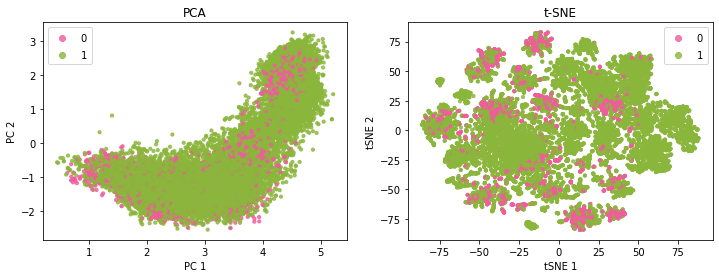

In [93]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title('PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
scatter = plt.scatter(transformed[:,0], transformed[:,1],
                      c=df['active'], cmap=matplotlib.colors.ListedColormap(colors),
                      s=10, alpha=0.8) #, cmap='bwr'
handles, labels = scatter.legend_elements()

#labels = ['ML', 'actives', 'decoys']
plt.legend(handles, labels, title='')

plt.subplot(122)
plt.title('t-SNE')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
scatter=plt.scatter(X_embedded[:,0], X_embedded[:,1], 
                    c=df['active'], cmap=matplotlib.colors.ListedColormap(colors),
                    s=10, alpha=0.8)
handles, labels = scatter.legend_elements()

#labels = ['ML', 'actives', 'decoys']
plt.legend(handles, labels, title='')

plt.savefig(path+"expl_ds_results/pca_tsne_docking.png")
plt.show

# Categories from the BINS

In [56]:
names_ds = names_ds[3:]

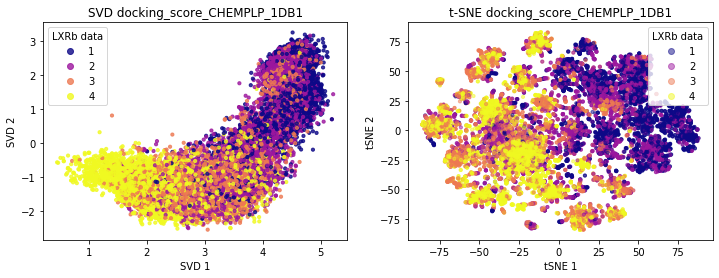

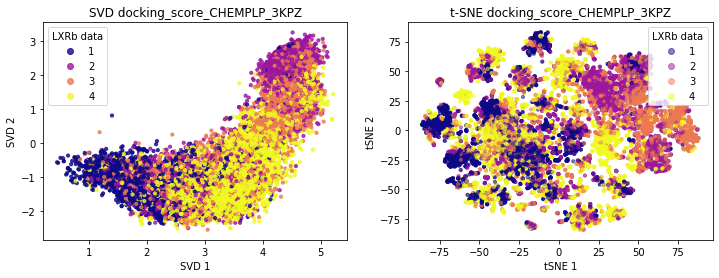

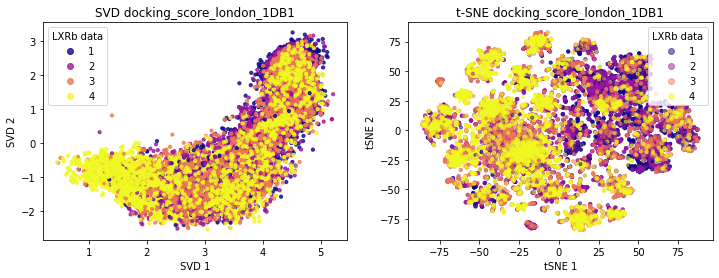

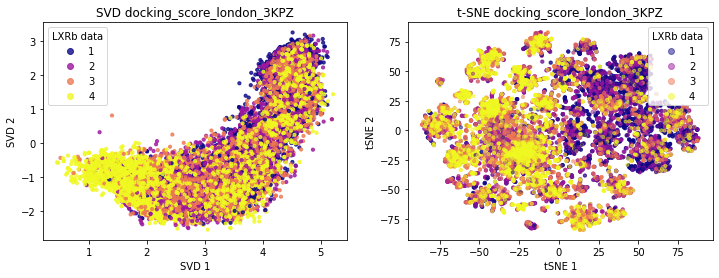

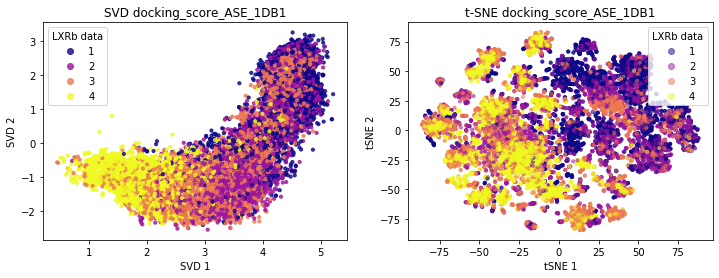

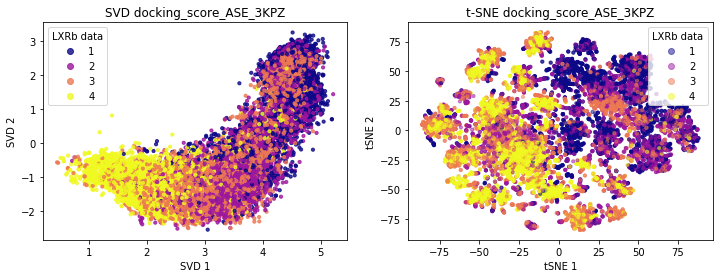

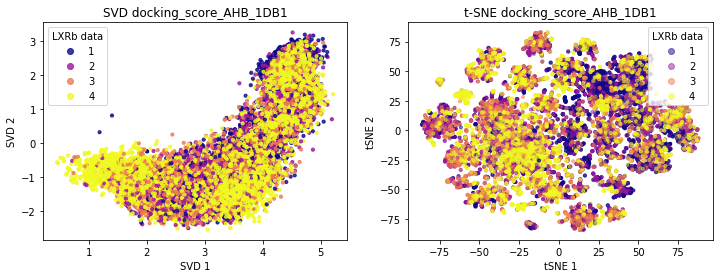

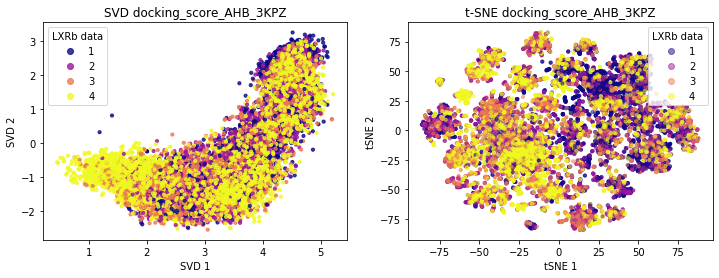

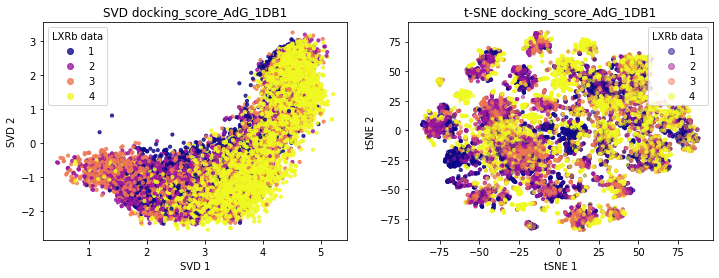

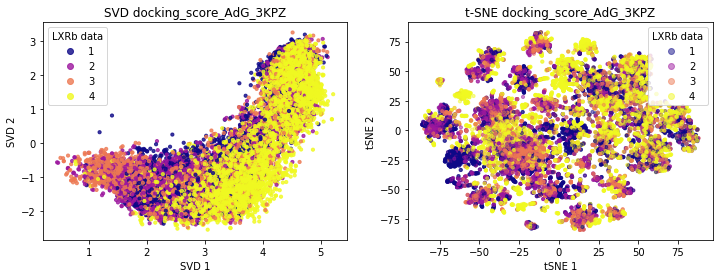

In [58]:
for name in names_ds:

    cats = pd.qcut(df[name], 4, labels=[1, 2, 3, 4])

    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plt.title('SVD ' + name)
    plt.xlabel('SVD 1')
    plt.ylabel('SVD 2')
    scatter = plt.scatter(transformed[:,0], 
                          transformed[:,1],
                          c=cats,
                          cmap='plasma',
                          s=10, alpha=0.8) #, cmap='bwr'
    handles, labels = scatter.legend_elements()
    labels = range(1, 5)
    plt.legend(handles, labels, title='LXRb data')

    plt.subplot(122)
    plt.title('t-SNE ' + name)
    plt.xlabel('tSNE 1')
    plt.ylabel('tSNE 2')
    scatter=plt.scatter(X_embedded[:,0], X_embedded[:,1],
                        c=cats,
                        cmap='plasma',
                        s=10, alpha=0.5)

    handles, labels = scatter.legend_elements()
    labels = range(1, 8)
    plt.legend(handles, labels, title='LXRb data')


    plt.savefig(path+name+".png", format="png") 
    plt.show()

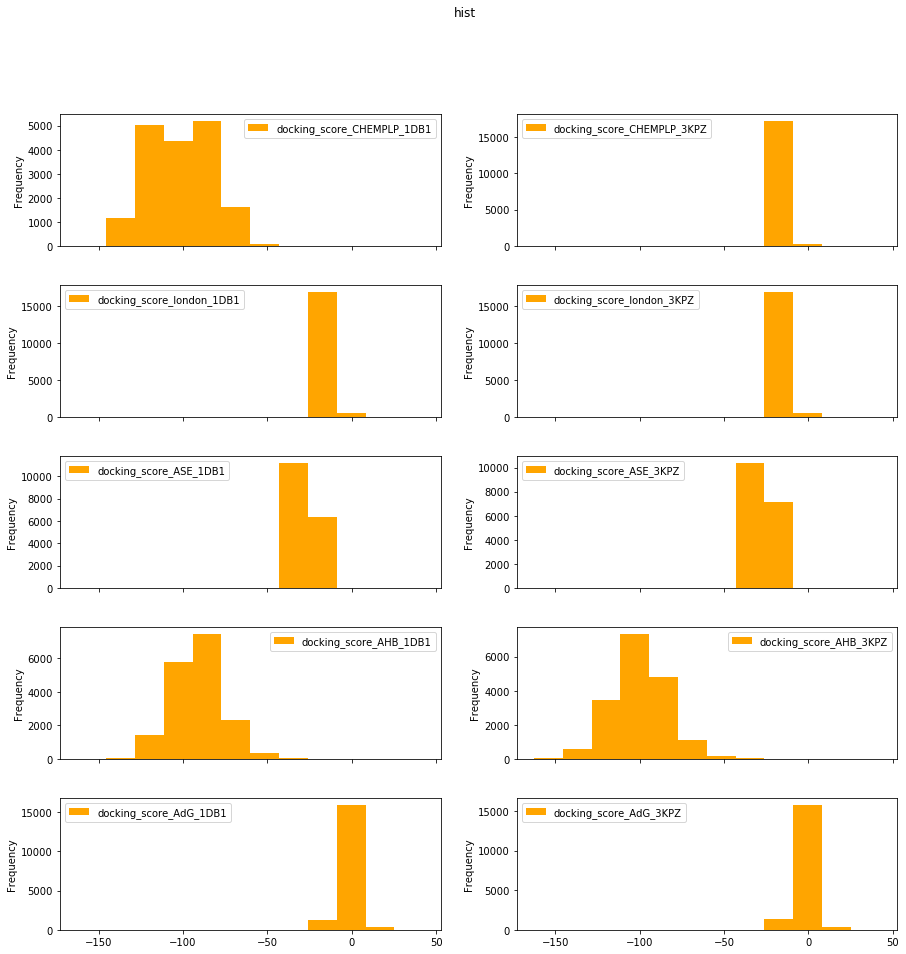

In [73]:
ax=df[names_ds].plot(kind='hist',subplots=True,title='hist',color='orange',grid=False,layout=(5,2),
                    figsize=(15,15), bins=12)
plt.subplots_adjust(hspace=0.3)

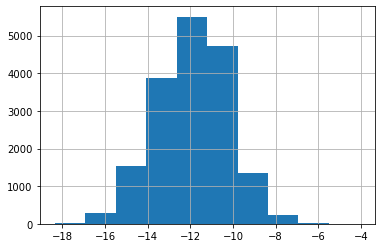

In [62]:
df[names_ds[2]].hist()

In [16]:
df['cat_1P8D'] = pd.cut(x=df['docking_score_ASE_1P8D']*-1, bins=[10, 25, 30 , 35, 45], 
                        labels=range(1,5))
df['cat_1PQ6'] = pd.cut(x=df['docking_score_ASE_1PQ6']*-1, bins=[10, 25, 30 , 35, 45], 
                        labels=range(1,5))

In [408]:
df_2.to_pickle(path+'cat_log_data.pckl')

In [409]:
decoys = df_2[df_2.label==True]
actives = df_2[df_2.label==False]
decoys.shape, actives.shape

((132, 10), (4387, 10))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


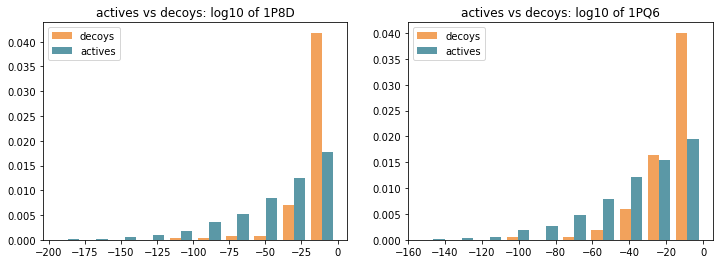

In [410]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.hist([decoys.log10_1P8D, actives.log10_1P8D], 10, density=True, histtype='bar', color=colors)
plt.legend(prop={'size': 10})
plt.title('actives vs decoys: log10 of 1P8D')
plt.legend(['decoys', 'actives'])

plt.subplot(122)
plt.hist([decoys.log10_1PQ6, actives.log10_1PQ6], 10, density=True, histtype='bar', color=colors)
plt.legend(prop={'size': 10})
plt.title('actives vs decoys: log10 of 1PQ6')
plt.legend(['decoys', 'actives'])

plt.savefig("f:/_phd/Docking_score/LXrb/hist_log10_1Pboth.svg", format="svg") 

In [132]:
#SAVE
file_out = path + 'log10_Data.pckl'
df.to_pickle(file_out)

# DATA in cathegory 1 of the log10 ECR_1P8D 

In [417]:
cat_1_1P8D = df_2[df_2.cat_1P8D==1]
cat_1_1PQ6 = df_2[df_2.cat_1PQ6==1]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


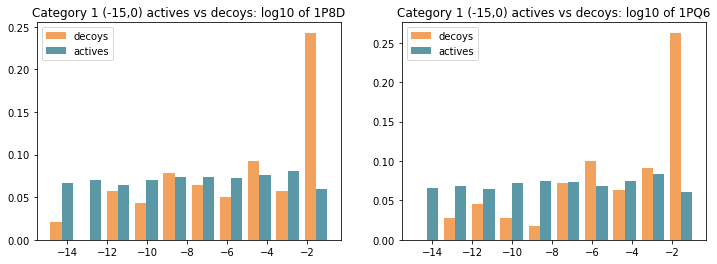

In [418]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
decoys = cat_1_1P8D[cat_1_1P8D.label==True]
actives = cat_1_1P8D[cat_1_1P8D.label==False]
plt.hist([decoys.log10_1P8D, actives.log10_1P8D], 10, density=True, histtype='bar', color=colors)
plt.legend(prop={'size': 10})
plt.title('Category 1 (-15,0) actives vs decoys: log10 of 1P8D')
plt.legend(['decoys', 'actives'])


plt.subplot(122)
decoys = cat_1_1PQ6[cat_1_1PQ6.label==True]
actives = cat_1_1PQ6[cat_1_1PQ6.label==False]

plt.hist([decoys.log10_1PQ6, actives.log10_1PQ6], 10, density=True, histtype='bar', color=colors)
plt.legend(prop={'size': 10})
plt.title('Category 1 (-15,0) actives vs decoys: log10 of 1PQ6')
plt.legend(['decoys', 'actives'])


plt.savefig("f:/_phd/Docking_score/LXrb/hist_cat_1_log10_both.svg", format="svg") 

In [419]:
cat_1_1P8D = df_2[df_2.cat_1P8D==2]
cat_1_1PQ6 = df_2[df_2.cat_1PQ6==2]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


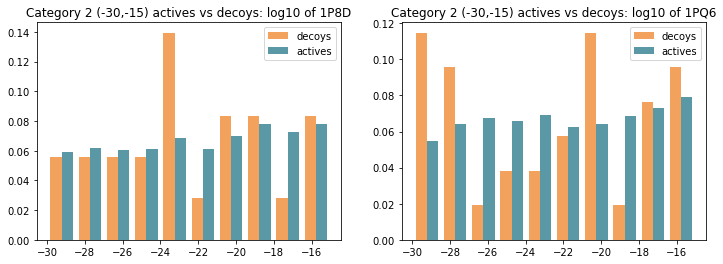

In [420]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
decoys = cat_1_1P8D[cat_1_1P8D.label==True]
actives = cat_1_1P8D[cat_1_1P8D.label==False]
plt.hist([decoys.log10_1P8D, actives.log10_1P8D], 10, density=True, histtype='bar', color=colors)
plt.legend(prop={'size': 10})
plt.title('Category 2 (-30,-15) actives vs decoys: log10 of 1P8D')
plt.legend(['decoys', 'actives'])


plt.subplot(122)
decoys = cat_1_1PQ6[cat_1_1PQ6.label==True]
actives = cat_1_1PQ6[cat_1_1PQ6.label==False]

plt.hist([decoys.log10_1PQ6, actives.log10_1PQ6], 10, density=True, histtype='bar', color=colors)
plt.legend(prop={'size': 10})
plt.title('Category 2 (-30,-15) actives vs decoys: log10 of 1PQ6')
plt.legend(['decoys', 'actives'])


plt.savefig("f:/_phd/Docking_score/LXrb/hist_cat_2_log10_both.svg", format="svg") 

In [421]:
cat_1_1P8D = df_2[df_2.cat_1P8D==3]
cat_1_1PQ6 = df_2[df_2.cat_1PQ6==3]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


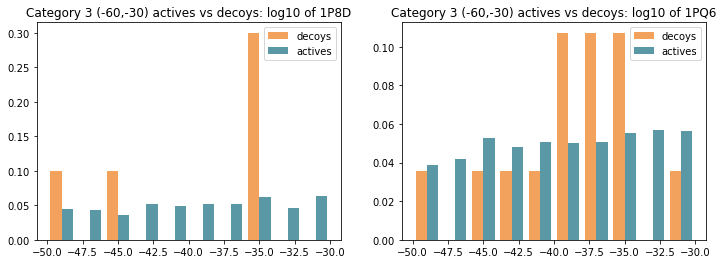

In [422]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
decoys = cat_1_1P8D[cat_1_1P8D.label==True]
actives = cat_1_1P8D[cat_1_1P8D.label==False]
plt.hist([decoys.log10_1P8D, actives.log10_1P8D], 10, density=True, histtype='bar', color=colors)
plt.legend(prop={'size': 10})
plt.title('Category 3 (-60,-30) actives vs decoys: log10 of 1P8D')
plt.legend(['decoys', 'actives'])


plt.subplot(122)
decoys = cat_1_1PQ6[cat_1_1PQ6.label==True]
actives = cat_1_1PQ6[cat_1_1PQ6.label==False]

plt.hist([decoys.log10_1PQ6, actives.log10_1PQ6], 10, density=True, histtype='bar', color=colors)
plt.legend(prop={'size': 10})
plt.title('Category 3 (-60,-30) actives vs decoys: log10 of 1PQ6')
plt.legend(['decoys', 'actives'])


plt.savefig("f:/_phd/Docking_score/LXrb/hist_cat_3_log10_both.svg", format="svg") 

# BINS correlations

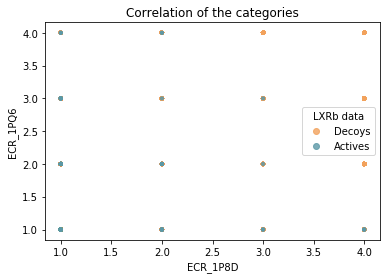

In [423]:
plt.title('Correlation of the categories')
plt.xlabel('ECR_1P8D')
plt.ylabel('ECR_1PQ6')
plt.scatter(df_2.cat_1P8D, df_2.cat_1PQ6, c=df_2.label,cmap=matplotlib.colors.ListedColormap(colors),
            s=10, alpha=0.8)

labels = ['Decoys', 'Actives']
plt.legend(handles, labels, title='LXRb data')

plt.savefig("f:/_phd/Docking_score/LXrb/corr_categories_ECRs.svg", format="svg") 

In [427]:
svd = TruncatedSVD(500) #85% of variance covered by 500 components
transformed = svd.fit_transform(df_2.fps.tolist())
X_embedded = TSNE(n_components=2, perplexity=50).fit_transform(transformed)
print(svd.explained_variance_ratio_.sum())

0.9130597405064937


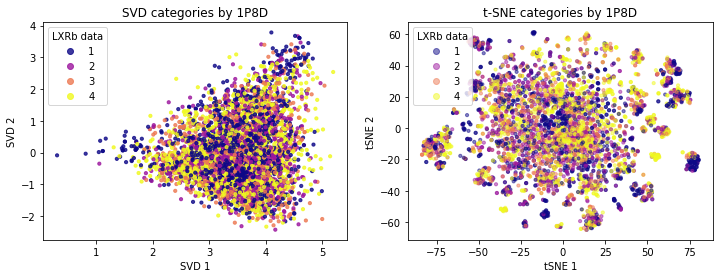

In [428]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title('SVD categories by 1P8D')
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')
scatter = plt.scatter(transformed[:,0], 
                      transformed[:,1],
                      c=df_2.cat_1P8D,
                      cmap='plasma',
                      s=10, alpha=0.8) #, cmap='bwr'
handles, labels = scatter.legend_elements()
labels = range(1, 5)
plt.legend(handles, labels, title='LXRb data')

plt.subplot(122)
plt.title('t-SNE categories by 1P8D')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
scatter=plt.scatter(X_embedded[:,0], X_embedded[:,1],
                    c=df_2.cat_1P8D,
                      cmap='plasma',
                      s=10, alpha=0.5)
                    
handles, labels = scatter.legend_elements()
labels = range(1, 8)
plt.legend(handles, labels, title='LXRb data')


plt.savefig("f:/_phd/Docking_score/LXrb/grouping_by_cat_1P8D.svg", format="svg") 

# justcategory 1

In [429]:
cat_1_1P8D = df_2[df_2.cat_1P8D==1]
mols_cat_1 = [Chem.MolFromSmiles(mol) for mol in list(cat_1_1P8D['smiles'])]
fps_cat_1 = [AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) for mol in mols_cat_1]

In [430]:
svd = TruncatedSVD(500) #85% of variance covered by 500 components
transformed = svd.fit_transform(fps_cat_1)
print(svd.explained_variance_ratio_.sum())

0.9611184426457118


In [431]:
X_embedded = TSNE(n_components=2, perplexity=50).fit_transform(transformed)

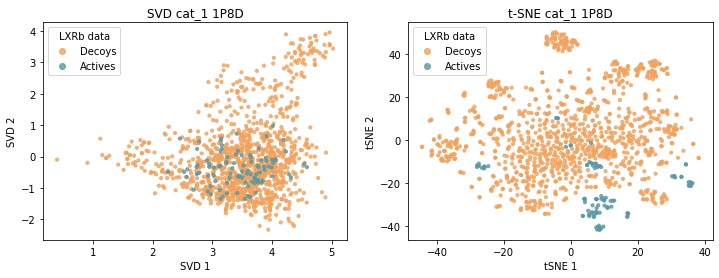

In [432]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title('SVD cat_1 1P8D')
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')
scatter = plt.scatter(transformed[:,0], transformed[:,1],
                      c=cat_1_1P8D.label,
                      cmap=matplotlib.colors.ListedColormap(colors),
                      s=10, alpha=0.8) #, cmap='bwr'

handles, labels = scatter.legend_elements()
labels = ['Decoys', 'Actives']
plt.legend(handles, labels, title='LXRb data')

plt.subplot(122)
plt.title('t-SNE cat_1 1P8D')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
scatter = plt.scatter(X_embedded[:,0], X_embedded[:,1],
                      c=cat_1_1P8D.label,
                      cmap=matplotlib.colors.ListedColormap(colors),
                      s=10, alpha=0.8) #, cmap='bwr'

handles, labels = scatter.legend_elements()
labels = ['Decoys', 'Actives']
plt.legend(handles, labels, title='LXRb data')



plt.savefig("f:/_phd/Docking_score/LXrb/SVD_tSNE_cat_1_1P8D.svg", format="svg") 

In [446]:
cat_1_1PQ6 = df_2[df_2.cat_1PQ6==1]
mols_cat_1 = [Chem.MolFromSmiles(mol) for mol in list(cat_1_1PQ6['smiles'])]
fps_cat_1 = [AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) for mol in mols_cat_1]
cat_1_1PQ6.shape

(1297, 10)

In [447]:
svd = TruncatedSVD(500) #85% of variance covered by 500 components
transformed = svd.fit_transform(fps_cat_1)
X_embedded = TSNE(n_components=2, perplexity=50).fit_transform(transformed)
print(svd.explained_variance_ratio_.sum(), X_embedded.shape)

0.9598677648342975 (1297, 2)


In [448]:
cat_1_1PQ6.label.shape

(1297,)

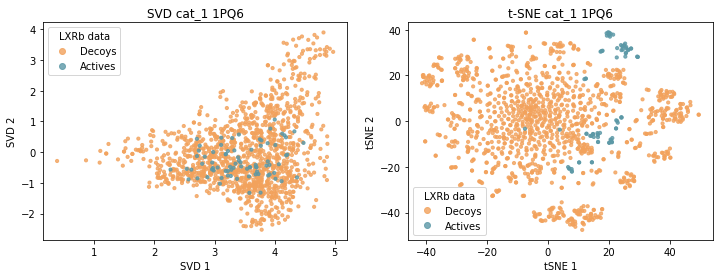

In [449]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title('SVD cat_1 1PQ6')
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')
scatter = plt.scatter(transformed[:,0], transformed[:,1],
                      c=cat_1_1PQ6.label,
                      cmap=matplotlib.colors.ListedColormap(colors),
                      s=10, alpha=0.8) #, cmap='bwr'

handles, labels = scatter.legend_elements()
labels = ['Decoys', 'Actives']
plt.legend(handles, labels, title='LXRb data')

plt.subplot(122)
plt.title('t-SNE cat_1 1PQ6')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
scatter = plt.scatter(X_embedded[:,0], X_embedded[:,1],
                      c=cat_1_1PQ6.label,
                      cmap=matplotlib.colors.ListedColormap(colors),
                      s=10, alpha=0.8) #, cmap='bwr'

handles, labels = scatter.legend_elements()
labels = ['Decoys', 'Actives']
plt.legend(handles, labels, title='LXRb data')



plt.savefig("f:/_phd/Docking_score/LXrb/SVD_tSNE_cat_1_1PQ6.svg", format="svg") 

# similiarity in Four categories

In [264]:
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

In [373]:
mols = [Chem.MolFromSmiles(mol) for mol in list(df_2['smiles'])]
fps = [AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) for mol in mols]

In [374]:
df_2['fps'] = fps
df_2.head()

,id,smiles,ECR_1P8D,ECR_1PQ6,log10_1PQ6,log10_1P8D,label,cat_1P8D,cat_1PQ6,fps
2941,C00057978,Brc1ccc(cc1)C1=Cc2c(OC1=O)cc(OCC)cc2,2.398798e-30,1.149808e-55,-54.939375,-29.620006,False,2,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
681,C00631561,Brc1cc(ccc1)\C=C\1/SC=2N([C@@H](C(C(OCC)=O)=C(...,2.405007e-31,1.624675e-34,-33.789233,-30.618884,False,3,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
1778,C00639187,Brc1ccc(S(=O)(=O)n2nc(C)c(Sc3ccc(Cl)cc3)c2C)cc1,2.455262e-39,1.432552e-24,-23.843890,-38.609902,False,3,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3387,C00640101,Brc1sc(S(=O)(=O)NCc2ccc(Cl)cc2Cl)cc1,6.149244e-46,3.681807e-41,-40.433939,-45.211178,False,3,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1079,C00640835,Clc1cc(\C=C/2\C(=O)N(NC\2=O)c2ccccc2)c(OCc2ccc...,3.297166e-37,1.865009e-10,-9.729319,-36.481859,False,3,1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [383]:
mols_list_1P8D = []

for i in range(1,5):
    mols_list_1P8D.append([Chem.MolFromSmiles(m) for m in df_2[df_2.cat_1P8D==i].smiles])

In [384]:
mols_list_1PQ6 = []

for i in range(1,5):
    mols_list_1PQ6.append([Chem.MolFromSmiles(m) for m in df_2[df_2.cat_1PQ6==i].smiles])

In [386]:
for i in range(1,5):
    ole = df_2[df_2.cat_1P8D==i]
    ore = df_2[df_2.cat_1PQ6==i]
    print(ole.shape, ore.shape)

(1236, 10) (1297, 10)
(980, 10) (1086, 10)
(923, 10) (1027, 10)
(1380, 10) (1109, 10)


# PICTURES of the structures in cats

In [387]:
for i in range(4): 
    img = Draw.MolsToGridImage(mols_list_1P8D[i][:8],molsPerRow=4,subImgSize=(200,200))
    img.save(path+'struct_1P8D_cat_'+str(i)+'.png')

In [388]:
for i in range(4): 
    img = Draw.MolsToGridImage(mols_list_1PQ6[i][:8],molsPerRow=4,subImgSize=(200,200))
    img.save(path+'struct_1PQ6_cat_'+str(i)+'.png')

In [391]:
smi_by_cat =[]
for i in range(1,5):
    ole = df_2[df_2.cat_1P8D==i]
    smi_by_cat.append(ole.smiles)

In [397]:
picker = MaxMinPicker()
selected_fps_per_cat = []


for k in range(4):
    mols = [Chem.MolFromSmiles(mol) for mol in smi_by_cat[k]]
    fps = [AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) for mol in mols]
    nfps = len(fps)
    def distij(i,j,fps=fps):
        return 1-DataStructs.DiceSimilarity(fps[i],fps[j])

    pickIndices = picker.LazyPick(distij, nfps, 900, seed=0)    
    picks = [fps[x] for x in pickIndices]
    selected_fps_per_cat.append(picks)

# Calculate Similarity

In [400]:
dist = []
for q in range(2):
    for k in range(1,4):
        a = 0
        b = 0
        for i in range(20):
            for j in range(20):
                b+=1
                a+=DataStructs.FingerprintSimilarity(selected_fps_per_cat[q][i],selected_fps_per_cat[k][j], 
                                                     metric=DataStructs.DiceSimilarity)

        dist.append(a/b)

dist

[0.15091081504404394,
 0.14557759147638727,
 0.14790682911397746,
 0.18717674746021337,
 0.15872829916534598,
 0.1621639240393007]

In [306]:
DataStructs.FingerprintSimilarity(selected_fps_per_cat[0][0],selected_fps_per_cat[0][0], metric=DataStructs.DiceSimilarity)

1.0